In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv(r'C:\Users\dvale\TFM\Data\all_variables.csv')

In [19]:
print(data.shape)
print(data.columns)

(39852, 26)
Index(['Unnamed: 0', 'id', 'weight', 'sex', 'age', 'civil_status',
       'familial_status', 'region', 'population_density', 'citizenship',
       'tenure_status', 'education_level', 'working_status',
       'working_status_agg', 'occupation', 'economic_sector', 'years_worked',
       'hours_week_worked', 'household_income', 'person_room',
       'self_perceived_bad_health', 'has_health_limitations',
       'has_chronic_condition', 'unmet_medical_treatment', 'has_support_net',
       'poverty_score'],
      dtype='object')


In [20]:
data = data.drop(['Unnamed: 0', 'id', 'weight', 'economic_sector', 'household_income'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39852 entries, 0 to 39851
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        39852 non-null  object 
 1   age                        39852 non-null  int64  
 2   civil_status               39852 non-null  object 
 3   familial_status            39852 non-null  object 
 4   region                     39852 non-null  object 
 5   population_density         39852 non-null  object 
 6   citizenship                39852 non-null  object 
 7   tenure_status              39852 non-null  object 
 8   education_level            39852 non-null  object 
 9   working_status             39852 non-null  object 
 10  working_status_agg         39852 non-null  object 
 11  occupation                 39852 non-null  object 
 12  years_worked               39852 non-null  int64  
 13  hours_week_worked          39852 non-null  int

In [21]:
data.person_room = data.person_room.fillna(data.person_room.median())

In [22]:
data.working_status.unique()

array(['Retired', 'Unpaid carer/domestic worker',
       'Disabled/unfit to work', 'Unemployed', 'Student', 'Employed',
       'Self-employed', 'Minor'], dtype=object)

In [23]:
data.working_status = np.where(data.working_status == 'Self-employed', 'Employed', data.working_status)
data.working_status.unique()

array(['Retired', 'Unpaid carer/domestic worker',
       'Disabled/unfit to work', 'Unemployed', 'Student', 'Employed',
       'Minor'], dtype=object)

In [24]:
data = data.drop(['working_status_agg'], axis=1)

In [25]:
scaler = StandardScaler()

num_var = data[['age', 'years_worked', 'hours_week_worked']]
scaler.fit(num_var)
scaled_var = pd.DataFrame(scaler.transform(num_var), columns=num_var.columns)

data.age = scaled_var.age
data.years_worked = scaled_var.years_worked
data.years_worked = scaled_var.years_worked

data.head()

,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status,education_level,working_status,occupation,years_worked,hours_week_worked,person_room,self_perceived_bad_health,has_health_limitations,has_chronic_condition,unmet_medical_treatment,has_support_net,poverty_score
0,Male,1.088573,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Clerical Support Workers,1.831752,0,2.500000,Yes,Yes,Yes,No,Yes,0.000000
1,Female,1.002616,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Unpaid carer/domestic worker,Clerical Support Workers,-0.922952,0,2.500000,No,No,Yes,No,Yes,0.000000
2,Female,1.174531,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Lower secondary education,Unpaid carer/domestic worker,Elementary Occupations,0.178930,0,2.500000,No,No,No,No,Yes,0.000000
3,Male,0.658786,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Services and Sales Workers,1.097164,0,2.500000,No,No,No,No,Yes,0.000000
4,Female,0.400914,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner,Higher education,Disabled/unfit to work,Services and Sales Workers,0.791086,0,1.666667,No,Yes,Yes,No,Yes,5.603701


In [26]:
def get_dummies(df):
    new_df = pd.DataFrame()
    for c in df.columns:
        if type(df[c][0]) == type('string'):
            dummy_df = pd.get_dummies(df[c])
            for dummy_column in dummy_df.columns:
                new_df[c + '_' + dummy_column] = dummy_df[dummy_column]
        else:
            new_df[c] = df[c]
    return new_df

In [27]:
data_final = get_dummies(data[data.columns[1:]])

data_final.head()

,age,civil_status_Divorced,civil_status_Married,civil_status_Married 'de facto',civil_status_Minor,civil_status_Never married,civil_status_Separated,civil_status_Widowed,familial_status_No,familial_status_Yes,...,has_health_limitations_No,has_health_limitations_Yes,has_chronic_condition_Minor,has_chronic_condition_No,has_chronic_condition_Yes,unmet_medical_treatment_No,unmet_medical_treatment_Yes,has_support_net_No,has_support_net_Yes,poverty_score
0,1.088573,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0.000000
1,1.002616,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,1,0.000000
2,1.174531,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0.000000
3,0.658786,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0.000000
4,0.400914,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,1,5.603701


In [28]:
data_final['is_minor'] = data_final.civil_status_Minor
data_final = data_final.drop(['civil_status_Minor', 
                               'working_status_Minor', 
                               'education_level_Minor'], axis=1)

In [29]:
data_final['material_deprivation'] = data.poverty_score.apply(lambda x: 1 if x > 2.02 else 0)
data_final = data_final.drop(['poverty_score'], axis=1)

count_yes = len(data_final[data_final.material_deprivation == 1])
count_no = len(data_final[data_final.material_deprivation == 0])
freq_yes = (count_yes/(count_yes+count_no))*100
freq_no = (count_no/(count_yes+count_no))*100

print('''Has material deprivation: {}%
Does not have material deprivation: {}%'''.format(round(freq_yes, 2), round(freq_no, 2)))

Has material deprivation: 20.94%
Does not have material deprivation: 79.06%


In [30]:
X = data_final.drop(['material_deprivation'], axis=1)
y = data_final.material_deprivation

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
frac = y_train.sum()/y_train.count()

training_data = X_train.copy()
training_data['material_deprivation'] = y_train.copy()
training_data_us = pd.concat([training_data[training_data.material_deprivation == 1], 
                              training_data[training_data.material_deprivation == 0].sample(frac=frac)]).sample(frac=1)

X_train_us = training_data_us.drop(['material_deprivation'], axis=1)
y_train_us = training_data_us.material_deprivation

In [32]:
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100)

rfe = RFE(random_forest)
rfe = rfe.fit(X_train_us, y_train_us)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True False False  True  True  True False False
 False False False False False  True  True False  True False  True False
 False False  True  True  True  True  True False False  True False False
  True  True  True  True  True  True  True  True  True False  True False
 False  True False False  True  True  True False False  True  True  True
 False False  True  True  True False False False False False  True False
  True  True False False False False False]
[ 1 13  1 25  1 26 18  1  1  1 14 19 17  5 10 21  3  1  1 29  1  7  1 23
 32 20  1  1  1  1  1 34  2  1 15 16  1  1  1  1  1  1  1  1  1 30  1  8
 31  1 12  9  1  1  1 35 33  1  1  1 27 11  1  1  1 38 22  6 39  4  1 36
  1  1 37 40 24 28 41]


In [102]:
selected_columns = [X_train.columns[i] for i in range(len(rfe.support_)) if rfe.support_[i] == True]
selected_columns

['sex_Female',
 'sex_Male',
 'age',
 'civil_status_Married',
 'civil_status_Never married',
 'familial_status_No',
 'familial_status_Yes',
 'region_Andalusia',
 'region_Castile–La Mancha',
 'region_Catalonia',
 'region_Comunity of Madrid',
 'region_Galicia',
 'population_density_Densely-populated area',
 'population_density_Intermediate area',
 'population_density_Thinly-populated area',
 'citizenship_Other (outside EU)',
 'citizenship_Spain',
 'tenure_status_Accommodation is rented at a reduced rate (lower price than the market price)',
 'tenure_status_Outright owner',
 'tenure_status_Owner paying mortgage',
 'tenure_status_Tenant or subtenant paying rent at prevailing or market rate',
 'education_level_Higher education',
 'education_level_Lower secondary education',
 'education_level_Pre-primary education',
 'education_level_Primary education',
 'education_level_Upper secondary education',
 'working_status_Employed',
 'working_status_Unemployed',
 'occupation_Economically inactive',


In [103]:
X_train_us = X_train_us[selected_columns]
X_test = X_test[selected_columns]

random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100).fit(X_train_us, y_train_us)

y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.85      9497
           1       0.13      0.75      0.22       466

    accuracy                           0.74      9963
   macro avg       0.56      0.75      0.53      9963
weighted avg       0.94      0.74      0.82      9963



In [104]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

In [105]:
proba_material_deprivation = [proba[1] for proba in random_forest.predict_proba(X_test)]

In [106]:
testing_data = X_test.copy()
testing_data['material_deprivation'] = y_test.copy()
testing_data['proba_material_deprivation'] = proba_material_deprivation

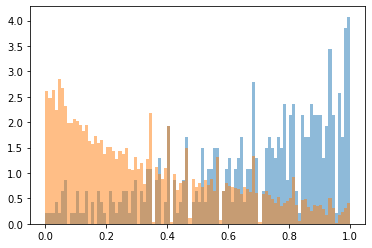

In [107]:
plt.hist(x='proba_material_deprivation', bins=100, data=testing_data[testing_data.material_deprivation == 1].reset_index(), 
         alpha=0.5, density=True)
plt.hist(x='proba_material_deprivation', bins=100, data=testing_data[testing_data.material_deprivation == 0].reset_index(), 
         alpha=0.5, density=True);